**PROJETO FINAL - GRUPO 6**<br>
Alberto Granja <br>
Ana Luiza Freire <br>
Frederico Félix <br>
Thainá Nilo



# Ambiente de execução: R
O primeiro passo é alterar o ambiente de execução. Na barra de tarefas, vá em abiente de execução -> alterar tipo de ambiente de execução -> Na caixa de diálogo, selecione 'R' em tipo de ambiente de execução.

# Roteiro projeto final


In [ ]:
# definir tamanho do gráfico
options(repr.plot.width=14, repr.plot.height=10)

In [ ]:
# pacotes necessários
install.packages(c("performance","see","patchwork","readr"))
library(performance)
library(see)
library(patchwork)
library(readr)
library(dplyr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘insight’, ‘datawizard’, ‘correlation’, ‘effectsize’, ‘modelbased’, ‘parameters’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Leitura dos dados

In [ ]:
# escolhendo o dataset Boston
data(Boston, package = "MASS")
data <- Boston

In [ ]:
# observando os dados
head(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
tail(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
501,0.22438,0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


**Descrição das colunas que serão analisadas no modelo** <br>

---

***Variável dependente: <br>***
- **medv**: Preço médio do valor das casas ocupadas <br>

***Variáveis independentes: <br>***
- **crim**: Taxa de criminalidade per capita <br>
- **dis**: Distância ponderada até cinco centros de emprego de Boston <br>
- **lstat**: Percentagem da população considerada classe baixa <br>

# Análise de regressão

## Ajustar modelo global (modelo inicial)


In [ ]:
# realizar regressão
m <- lm(medv ~ crim + dis + lstat,  data = data)
# Checar coeficientes do modelo
coef(m)

(Intercept)        crim         dis       lstat 
 38.5231838  -0.1066872  -0.7655147  -1.0036858

$ medv = 38.52 - 0.107crim - 0.765dis - 1.004lstat $

### Estimar parâmetros do modelo

In [ ]:
# sumário completo do modelo
summary(m)


Call:
lm(formula = medv ~ crim + dis + lstat, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.791  -3.851  -1.513   2.108  22.922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.52318    0.99761  38.616  < 2e-16 ***
crim        -0.10669    0.03588  -2.974  0.00308 ** 
dis         -0.76551    0.15033  -5.092 5.02e-07 ***
lstat       -1.00369    0.04607 -21.786  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.05 on 502 degrees of freedom
Multiple R-squared:  0.5698,	Adjusted R-squared:  0.5672 
F-statistic: 221.6 on 3 and 502 DF,  p-value: < 2.2e-16


- H0 = Coeficientes do modelo não são estatisticamente significativos
- Ha = Coeficientes do modelo são estatisticamente significativos

  Caso p-valor < 0.05, rejeita a hipótese nula


```
F-statistic: 221.6 on 3 and 502 DF,  p-value: < 2.2e-16
```

O p-valor < 0.05, desta forma podemos afirmar que o modelo é superior a um modelo apenas com o intercepto, ou seja, pelo menos alguma das variáveis selecionadas ajuda a explicar o modelo.

```
Residuals:
    Min      1Q  Median      3Q     Max
-16.791  -3.851  -1.513   2.108  22.922
```
Neste caso, a mediana dos resíduos está distante de zero e o mínimo e o máximo não estão muito próximos em valores absolutos.  


```
Coefficients:
             Estimate   Std. Error    t value     Pr(>|t|)    
(Intercept)  38.52318      0.99761     38.616      < 2e-16 ***
crim         -0.10669      0.03588     -2.974      0.00308 **
dis          -0.76551      0.15033     -5.092      5.02e-07 ***
lstat        -1.00369      0.04607    -21.786      < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
```

- **crim - Taxa de criminalidade per capita:**
p-valor < 0.05, logo rejeita a hipótese nula. O coeficiente de criminalidade é estatisticamente significativo para o modelo. Entende-se que há uma relação negativa entre crim e medv. O aumento de uma unidade na taxa de criminalidade diminui o valor das casas em 0.107.

- **dis - Distância ponderada até cinco centros de emprego de Boston:**
p-valor < 0.05, logo rejeita a hipótese nula. O coeficiente de distancia até o centro é estatisticamente significativo para o modelo. Entende-se que há uma relação negativa entre dis e medv. O aumento de uma unidade na distancia diminui o valor das casas em 0.765.

- **lstat - Percentagem da população considerada classe baixa:**
p-valor < 0.05, logo rejeita a hipótese nula. O coeficiente de lstat é estatisticamente significativo para o modelo. Entende-se que há uma relação negativa entre lstat e medv. O aumento de uma unidade no percentual da população de classe baixa diminui o valor das casas em 1.004.


Concluimos que no modelo inicial, m, todas as variáveis escolhidas são estatisticamente significativas.




```
Residual standard error: 6.05 on 502 degrees of freedom
Multiple R-squared:  0.5698,	Adjusted R-squared:  0.5672
```

O R² do modelo ficou baixo. R² = 0,5698, R² ajustado = 0,567.

### Verificar condições de aplicação

**Verificar normalidade dos resíduos**

In [ ]:
# teste de aderência
shapiro.test(m$residuals)


	Shapiro-Wilk normality test

data:  m$residuals
W = 0.88809, p-value < 2.2e-16


P-valor < 0.05, logo os resíduos não são distribuidos normalmente.

**Verificar linearidade e homogeneidade da variância**

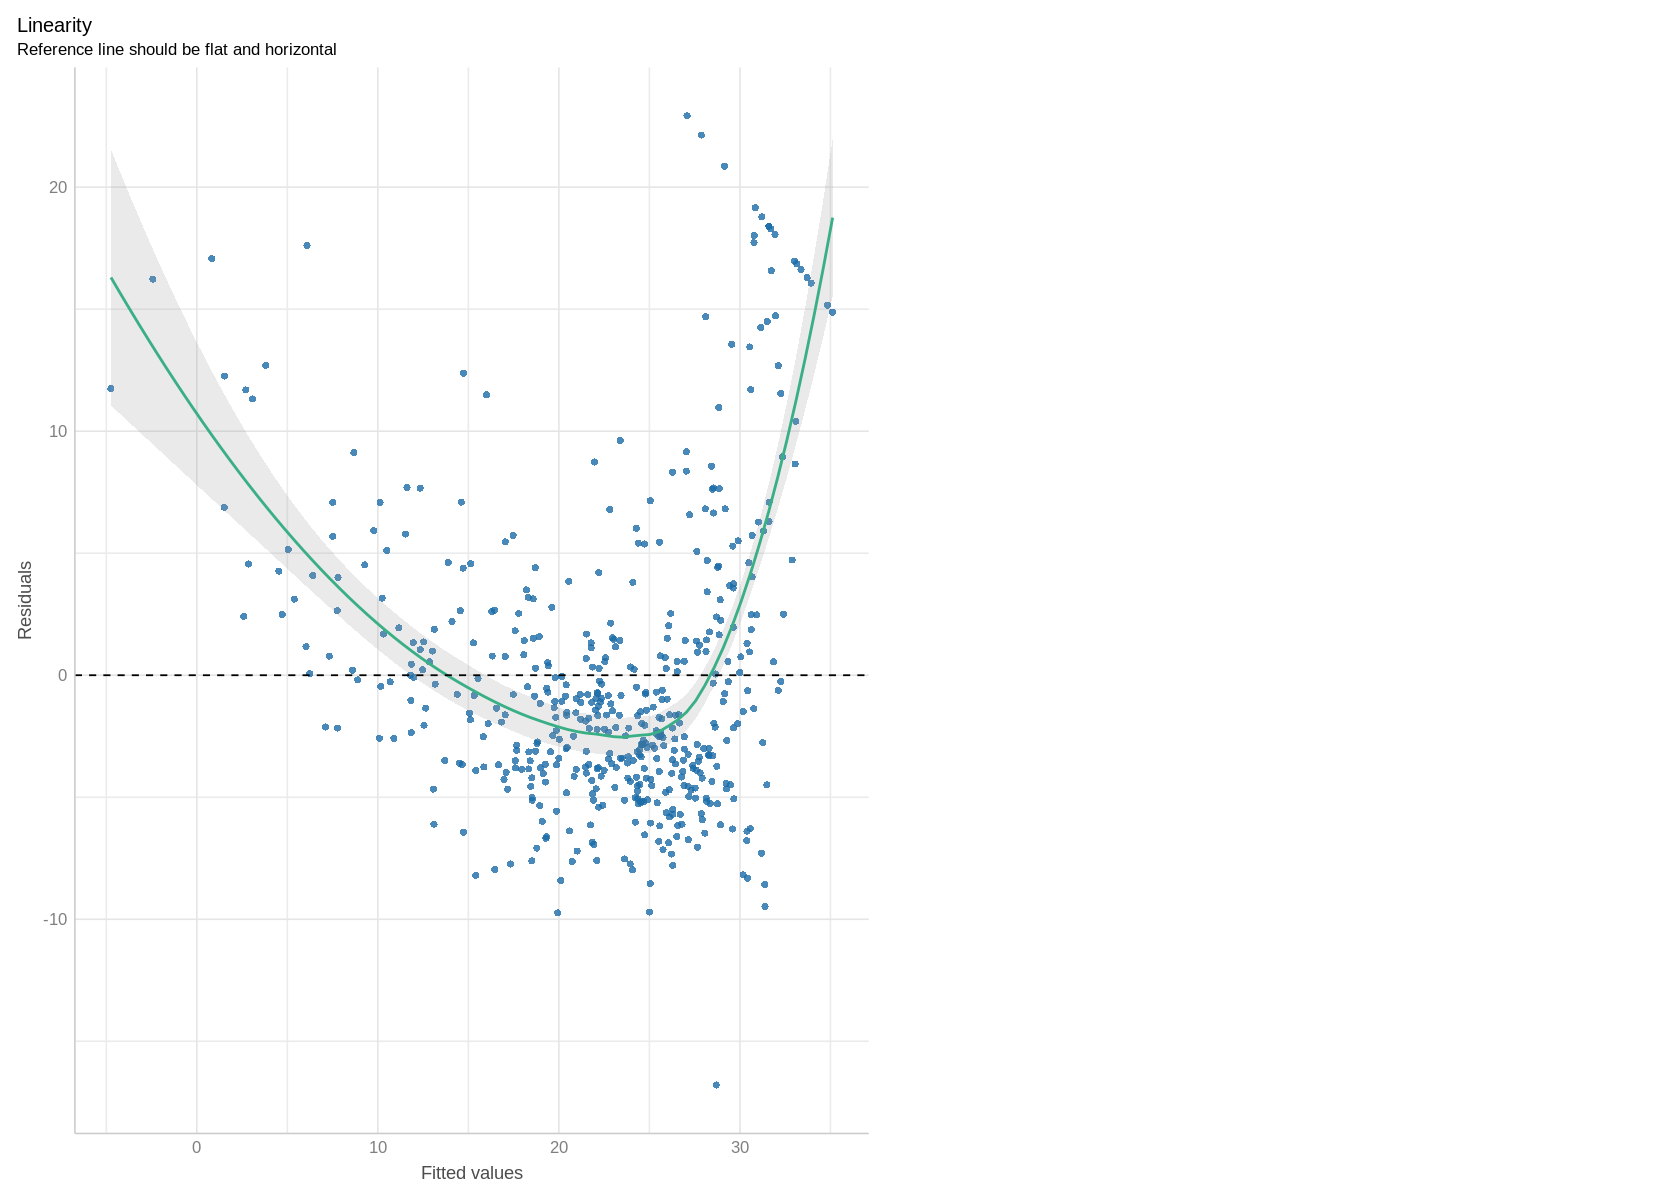

In [ ]:
# verificar linearidade
check_model(m, check="linearity")

O modelo não é linear. Seguem uma forte comportamento de parábola.

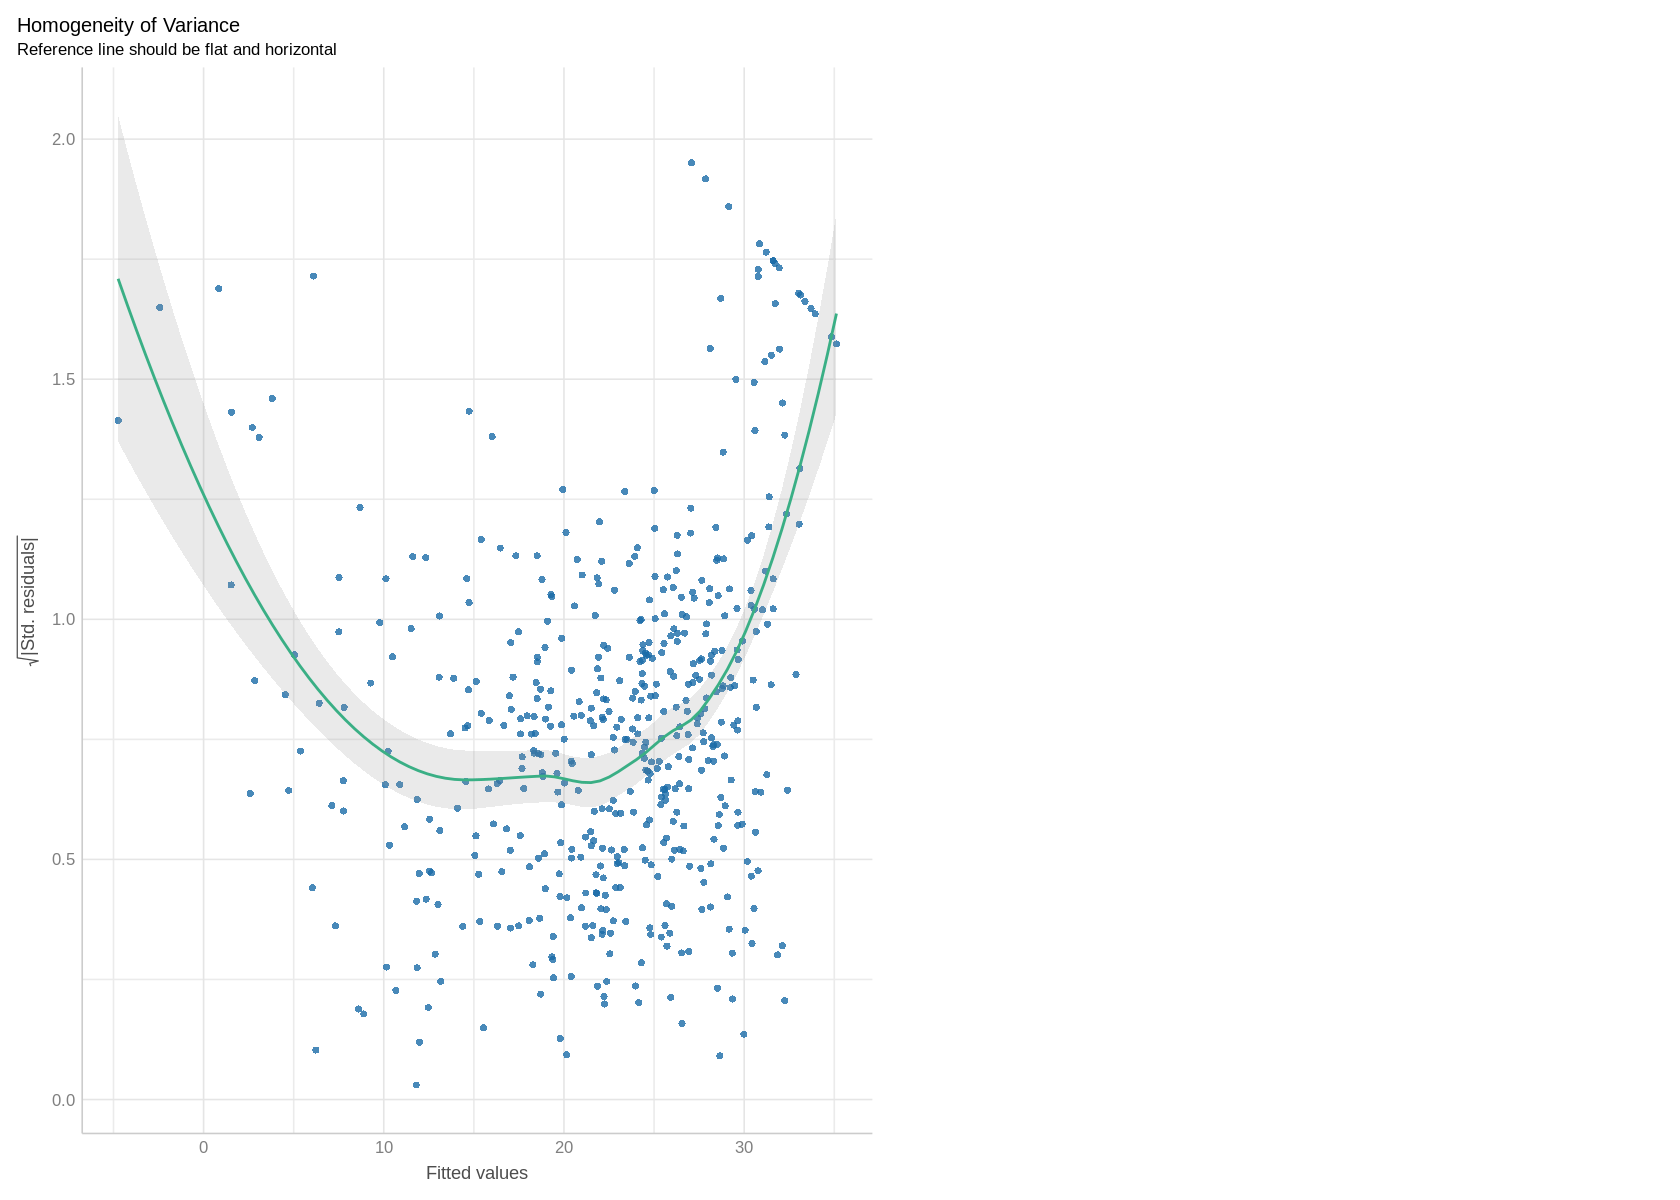

In [ ]:
# verificar homogeneidade
check_model(m, check="homogeneity")

O modelo não é homogeneo. Apresenta um forte comportamento de parábola.

**Conclusões:**<br>
Para ambas as condições a linha mostrou uma forma de U, por este motivo é provável que o preditor deva ser melhor modelado com um termo quadrático. O ideal é analisar de forma independente cada variável para ajustar o modelo.

### Comparando modelos

**Análise de linearidade por variável**

Nos passos a seguir analisamos a linearidade de cada variável independente e testamos a linearidade destas com graus de polinomio diversos. Mantivemos abaixo apenas um exemplo de cada com grau 2.

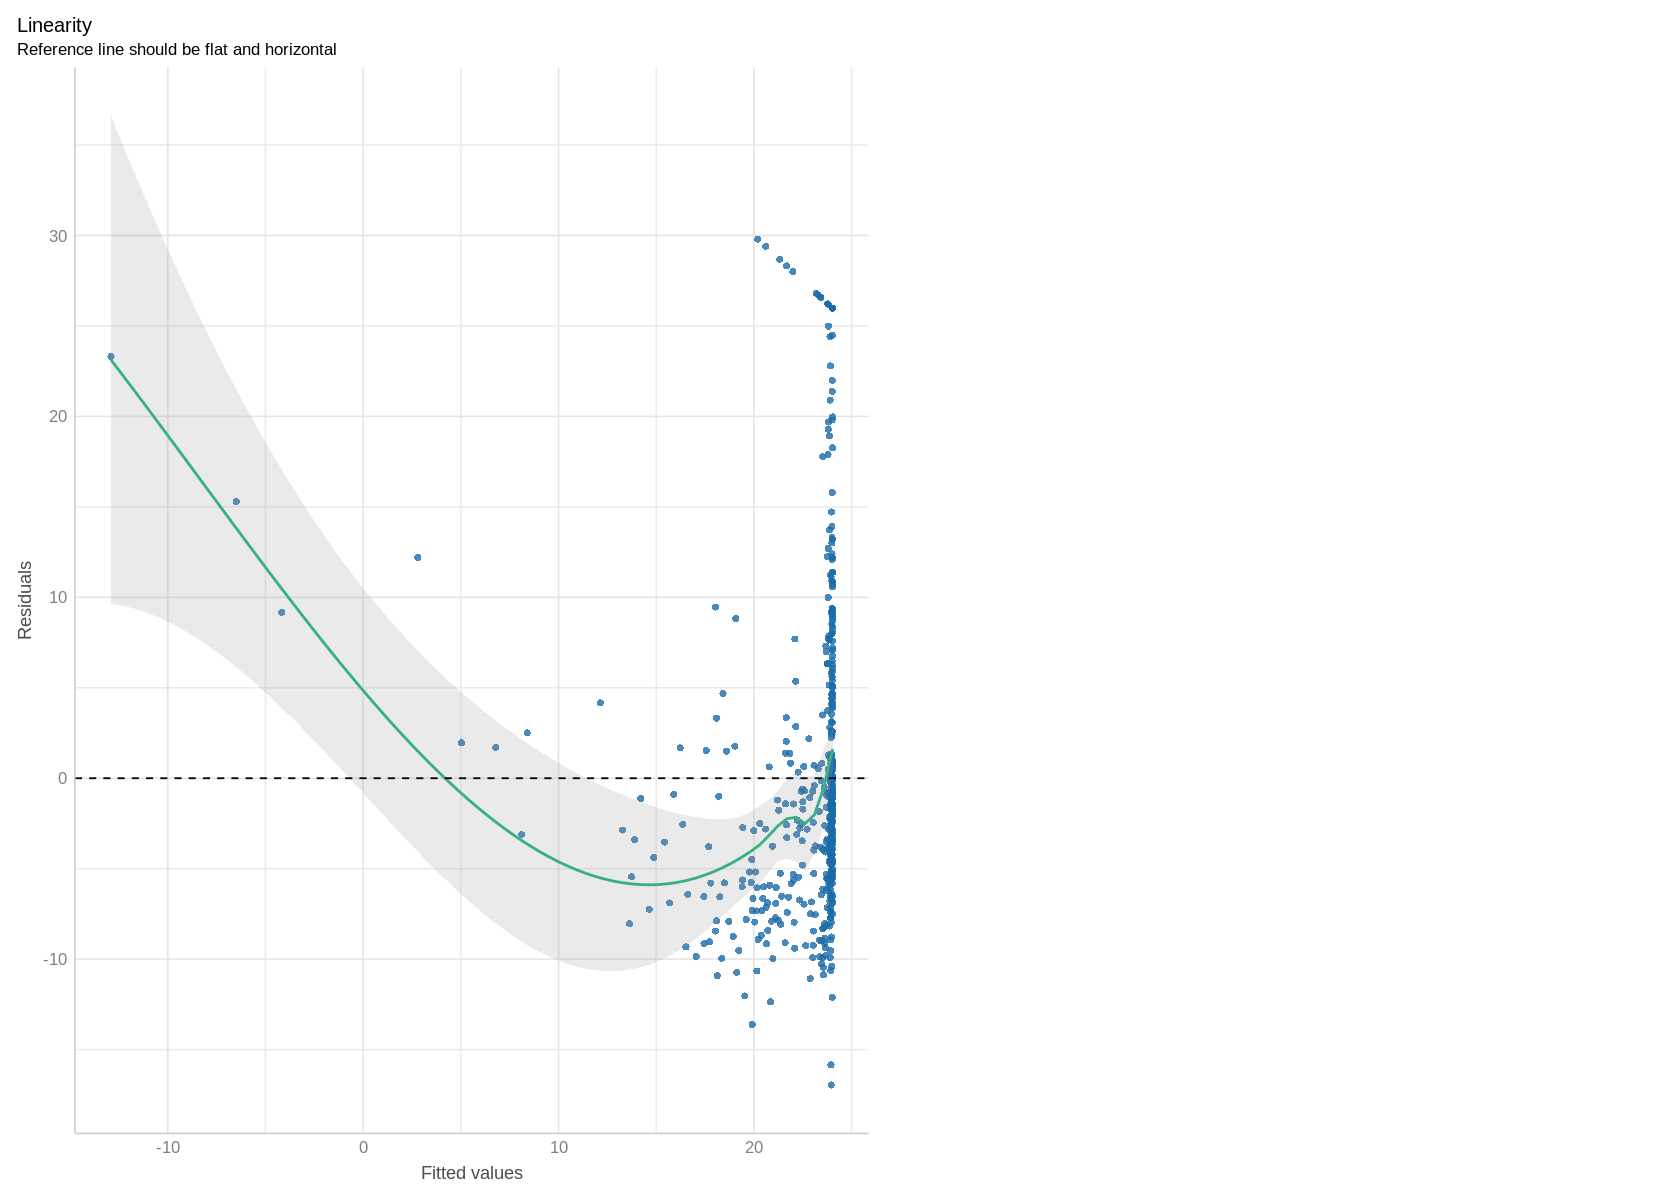

In [ ]:
# Crim - criminalidade
check_model(lm(medv ~ crim, data = data), check=c("linearity"))

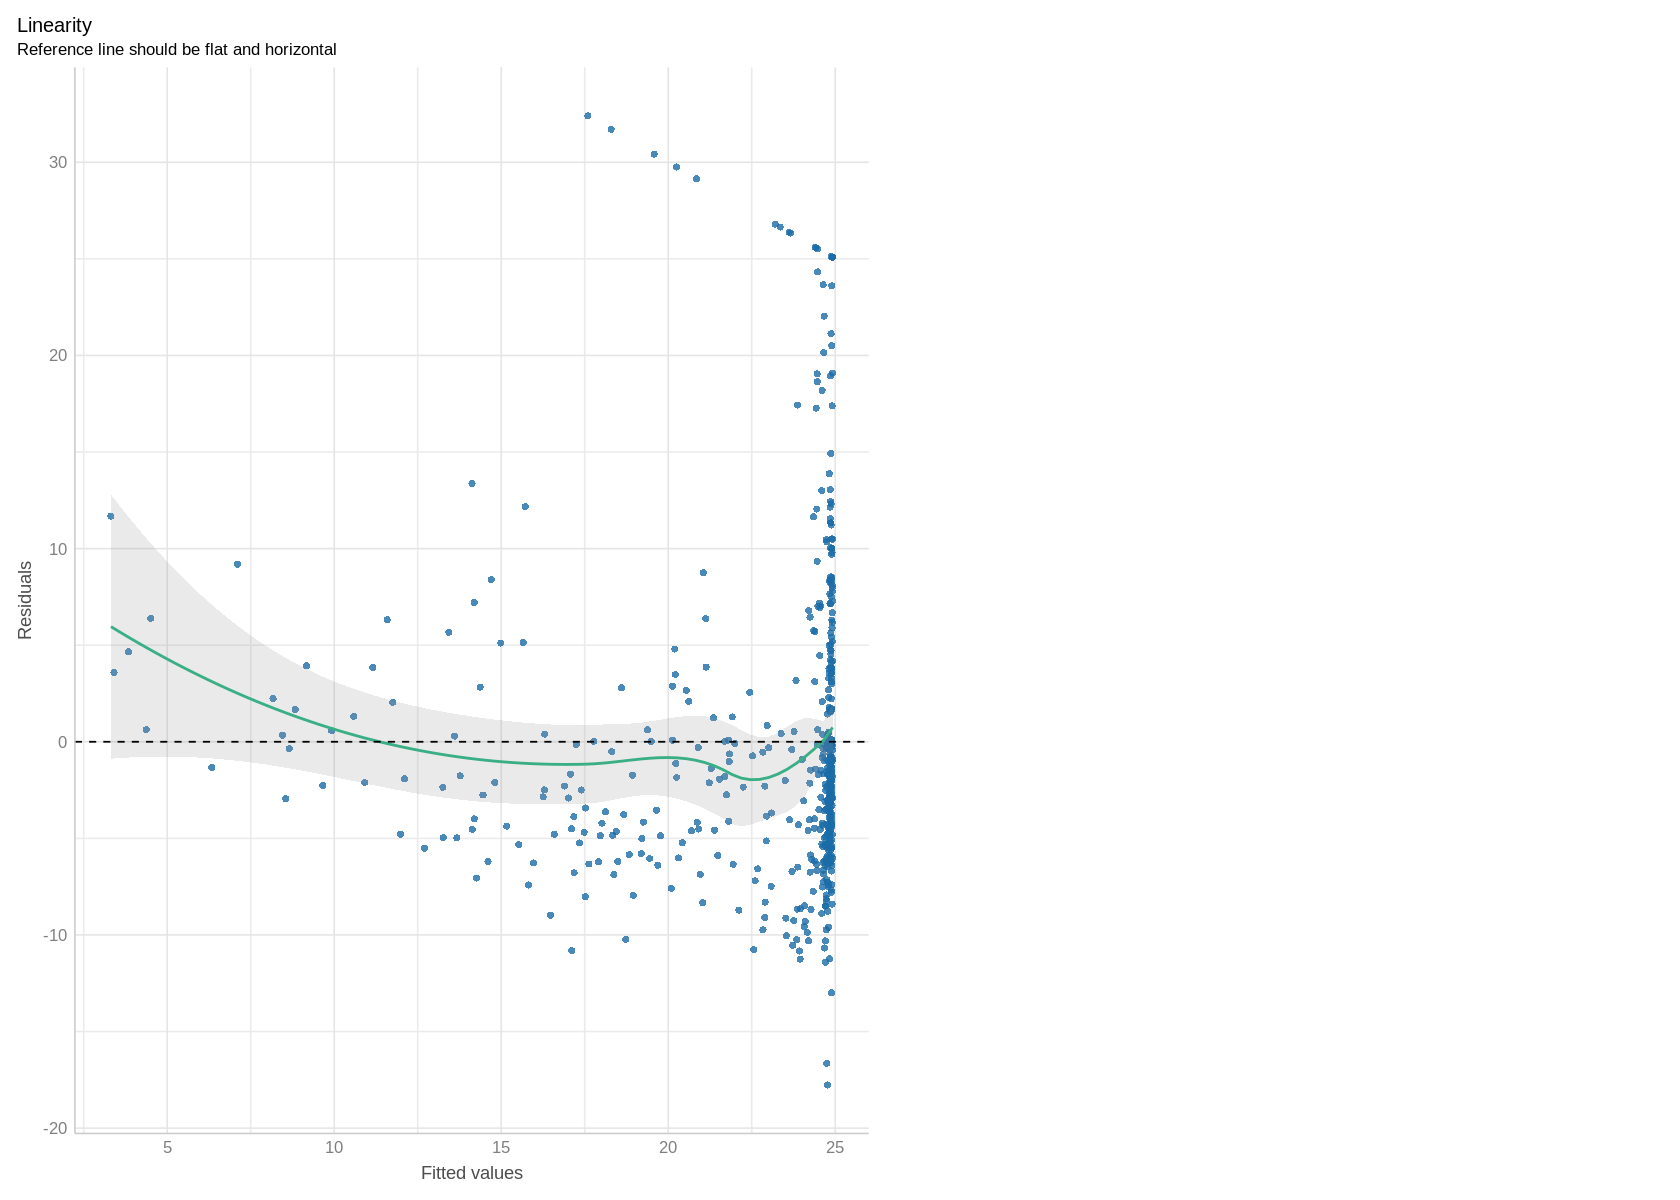

In [ ]:
# crim - polinomio de grau 2
check_model(lm(medv ~ poly(crim,2), data = data), check=c("linearity"))

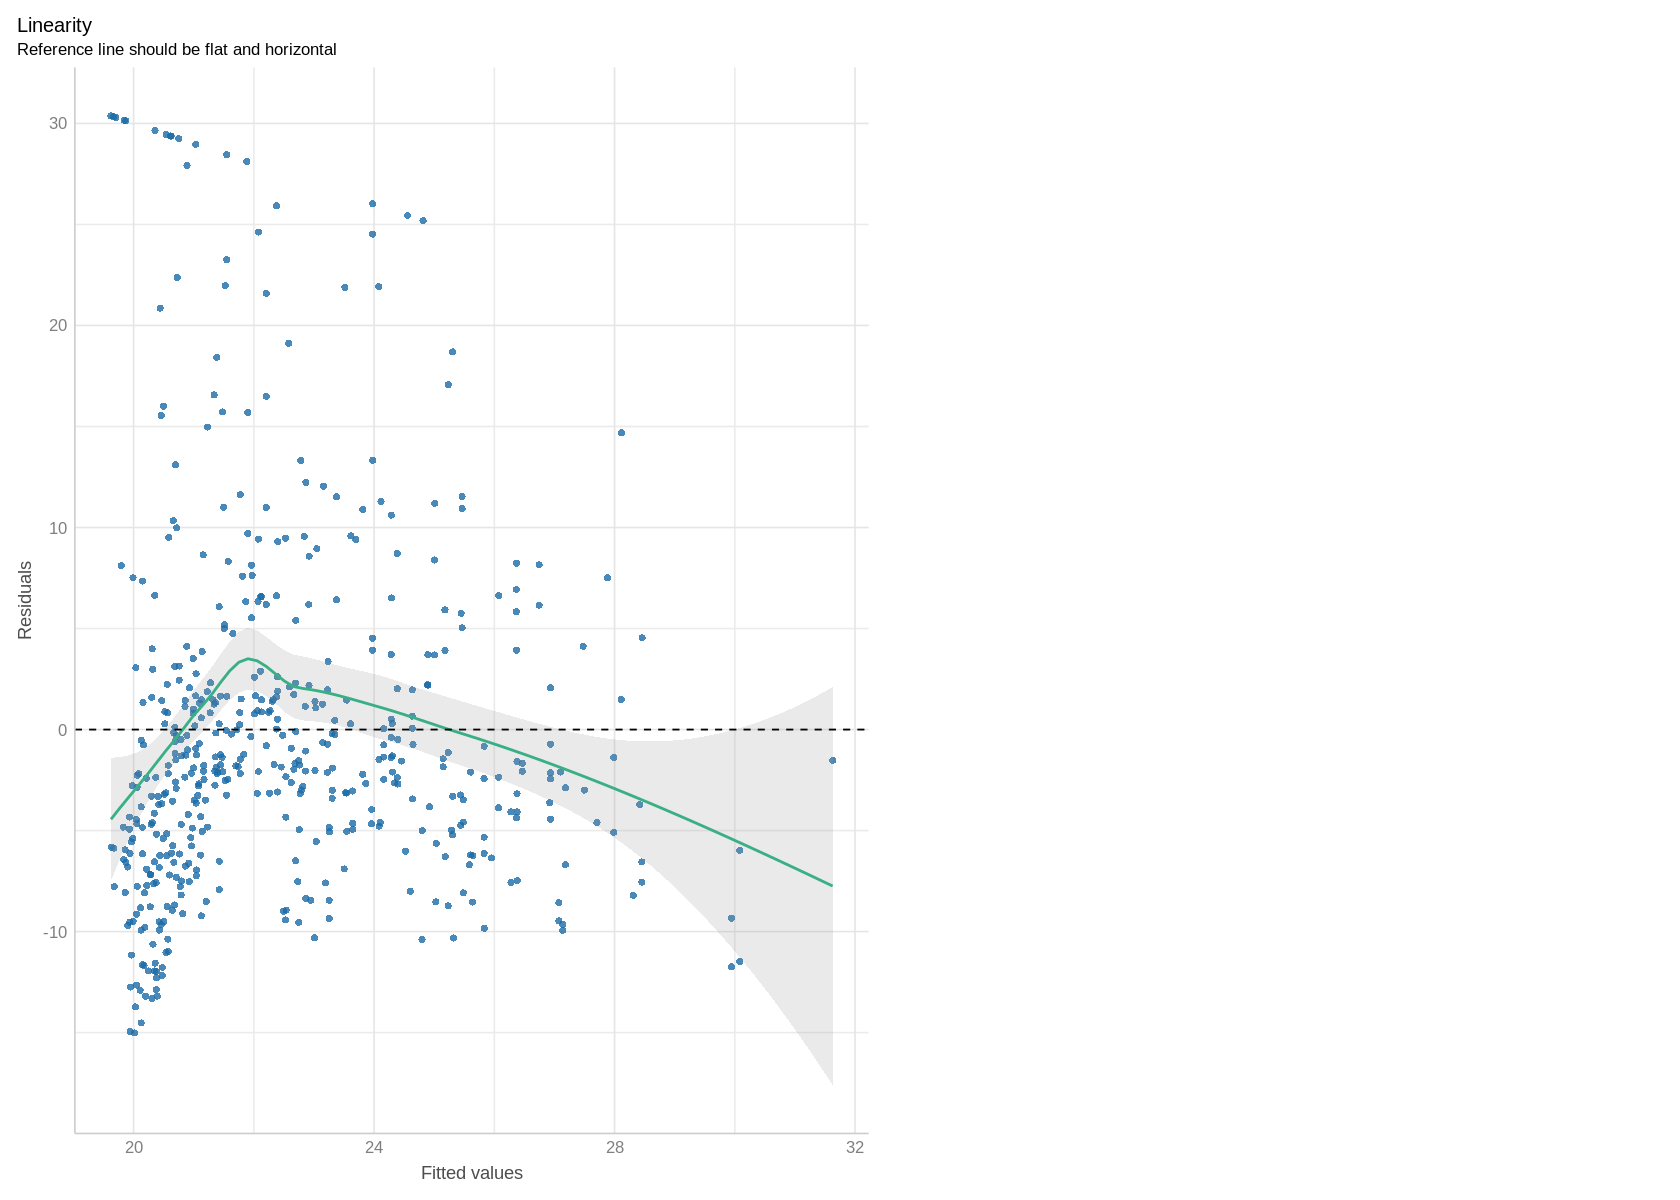

In [ ]:
# Dis - distancia para os centros
check_model(lm(medv ~ dis, data = data), check=c("linearity"))

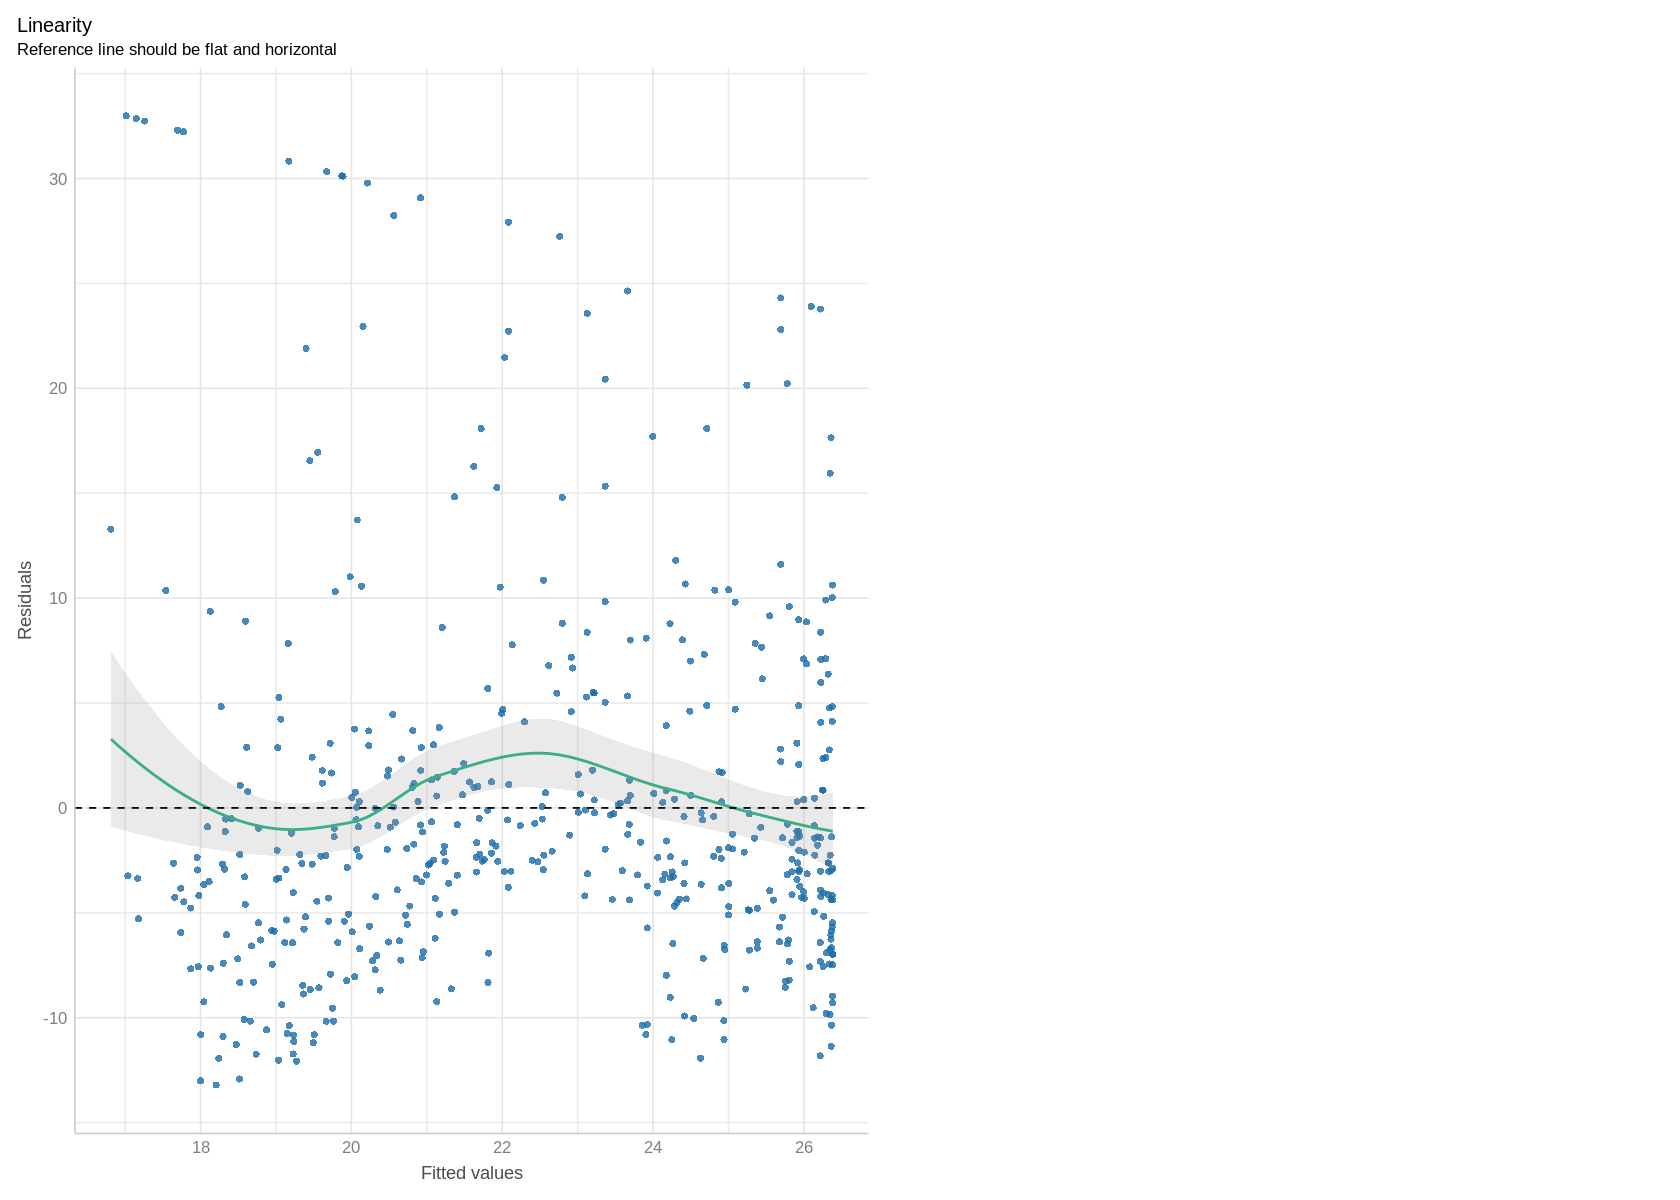

In [ ]:
# dis - polinomio de grau 2
check_model(lm(medv ~ poly(dis,2), data = data), check=c("linearity"))

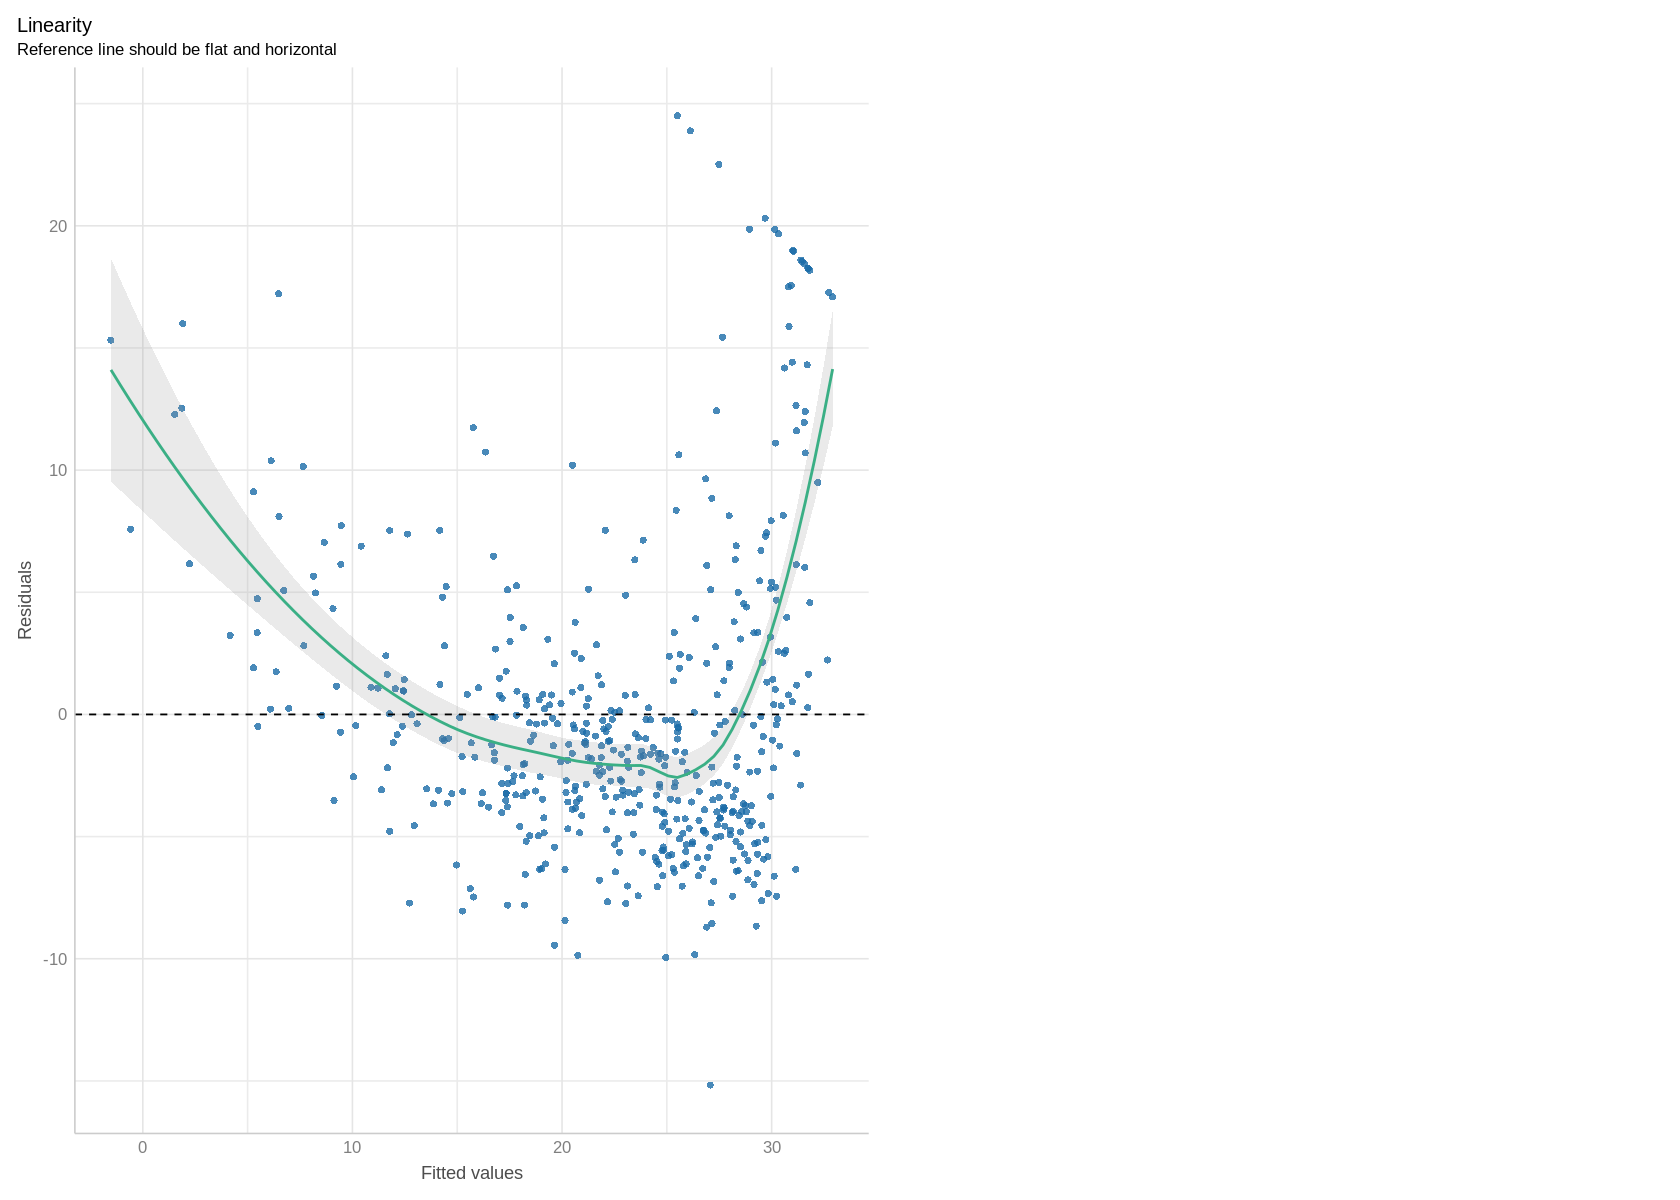

In [ ]:
# Lstat - população considerada classe baixa
check_model(lm(medv ~ lstat, data = data), check=c("linearity"))

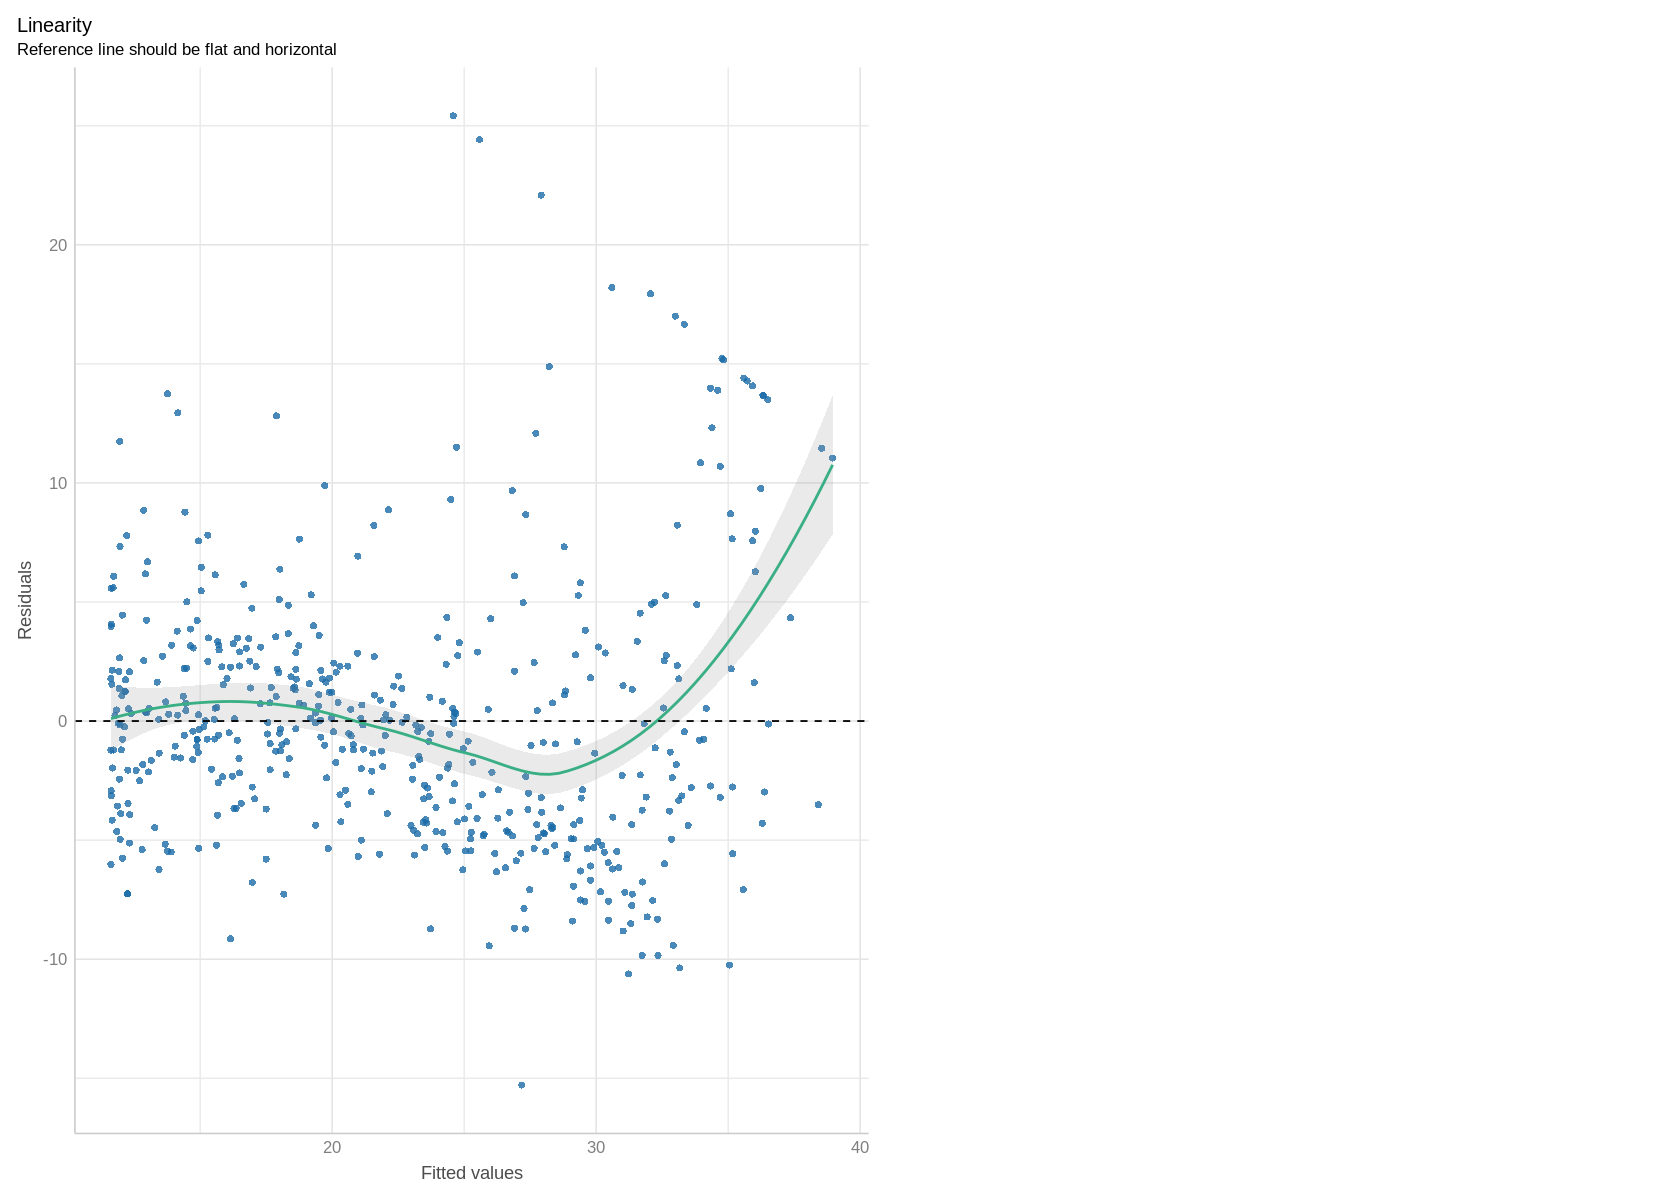

In [ ]:
# lstat - polinomio de grau 2
check_model(lm(medv ~ poly(lstat,2), data = data), check=c("linearity"))

**Analisar o p-valor e comparar o R² dos modelos** <br>
Nas linhas a seguir verificamos o p-valor de modelos utilizando as variaveis com polinomios de grau 2.

**OBS:** Para todos os modelos testados o p-valor foi abaixo de 0,05, o que nos permite avançar na comparação apenas do R².

In [ ]:
# relembrando o modelo inicial
summary(m)


Call:
lm(formula = medv ~ crim + dis + lstat, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.791  -3.851  -1.513   2.108  22.922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 38.52318    0.99761  38.616  < 2e-16 ***
crim        -0.10669    0.03588  -2.974  0.00308 ** 
dis         -0.76551    0.15033  -5.092 5.02e-07 ***
lstat       -1.00369    0.04607 -21.786  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.05 on 502 degrees of freedom
Multiple R-squared:  0.5698,	Adjusted R-squared:  0.5672 
F-statistic: 221.6 on 3 and 502 DF,  p-value: < 2.2e-16


In [ ]:
# modelo com polinomio de grau 2 em lstat apenas e retirando crim
modelo_dislstat2 <- lm(medv ~ dis + poly(lstat,2),  data = data)
summary(modelo_dislstat2)


Call:
lm(formula = medv ~ dis + poly(lstat, 2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.041  -3.518  -0.616   2.355  22.765 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       25.8713     0.5461  47.376  < 2e-16 ***
dis               -0.8797     0.1299  -6.775  3.5e-11 ***
poly(lstat, 2)1 -173.1481     6.1104 -28.337  < 2e-16 ***
poly(lstat, 2)2   68.6127     5.3320  12.868  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.293 on 502 degrees of freedom
Multiple R-squared:  0.6708,	Adjusted R-squared:  0.6688 
F-statistic:   341 on 3 and 502 DF,  p-value: < 2.2e-16


In [ ]:
# modelo com polinomio de grau 2 em lstat apenas mas mantendo as outras variáveis
modelo_crimdislstat2 <- lm(medv ~ crim + dis + poly(lstat,2),  data = data)
summary(modelo_crimdislstat2)


Call:
lm(formula = medv ~ crim + dis + poly(lstat, 2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.4750  -3.4271  -0.6696   2.1775  23.5311 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       26.97156    0.57503  46.905  < 2e-16 ***
crim              -0.15726    0.03085  -5.098 4.89e-07 ***
dis               -1.01988    0.12969  -7.864 2.30e-14 ***
poly(lstat, 2)1 -162.59461    6.31295 -25.756  < 2e-16 ***
poly(lstat, 2)2   71.81021    5.24175  13.700  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.166 on 501 degrees of freedom
Multiple R-squared:  0.687,	Adjusted R-squared:  0.6845 
F-statistic:   275 on 4 and 501 DF,  p-value: < 2.2e-16


In [ ]:
# modelo com polinomio de grau 2 em dis e lstat apenas
modelo_crimdis2lstat2 <- lm(medv ~ crim + poly(dis,2) + poly(lstat,2),  data = data)
summary(modelo_crimdis2lstat2)


Call:
lm(formula = medv ~ crim + poly(dis, 2) + poly(lstat, 2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.5864  -3.4697  -0.7194   2.1831  23.0411 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       23.13129    0.25657  90.155  < 2e-16 ***
crim              -0.16562    0.03171  -5.224 2.58e-07 ***
poly(dis, 2)1    -49.61178    6.24896  -7.939 1.35e-14 ***
poly(dis, 2)2      6.35045    5.58438   1.137    0.256    
poly(lstat, 2)1 -164.16597    6.46061 -25.410  < 2e-16 ***
poly(lstat, 2)2   71.40150    5.25252  13.594  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.164 on 500 degrees of freedom
Multiple R-squared:  0.6879,	Adjusted R-squared:  0.6847 
F-statistic: 220.4 on 5 and 500 DF,  p-value: < 2.2e-16


In [ ]:
# modelo com polinomio de grau 2 em todas as variaveis
modelo_crim2dis2lstat2 <- lm(medv ~ poly(crim,2) + poly(dis,2) + poly(lstat,2),  data = data)
summary(modelo_crim2dis2lstat2)


Call:
lm(formula = medv ~ poly(crim, 2) + poly(dis, 2) + poly(lstat, 
    2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.8578  -3.2836  -0.7456   2.3690  23.5601 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2288  98.497  < 2e-16 ***
poly(crim, 2)1   -36.2051     6.4171  -5.642 2.82e-08 ***
poly(crim, 2)2    12.7729     6.0053   2.127   0.0339 *  
poly(dis, 2)1    -53.2527     6.4581  -8.246 1.46e-15 ***
poly(dis, 2)2      8.8302     5.6856   1.553   0.1210    
poly(lstat, 2)1 -159.8262     6.7536 -23.665  < 2e-16 ***
poly(lstat, 2)2   72.7190     5.2706  13.797  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.146 on 499 degrees of freedom
Multiple R-squared:  0.6907,	Adjusted R-squared:  0.6869 
F-statistic: 185.7 on 6 and 499 DF,  p-value: < 2.2e-16


**Verificando as condições do melhor modelo encontrado**
<br>
```
modelo_crim2dis2lstat2 = intercept + crim^2 + crim + dis^2 + dis + lstat^2 + lstat
```

In [ ]:
# distribuição dos residuos
shapiro.test(modelo_crim2dis2lstat2$residuals)


	Shapiro-Wilk normality test

data:  modelo_crim2dis2lstat2$residuals
W = 0.94822, p-value = 2.629e-12


Resultado: não estão distribuidos normalmente.

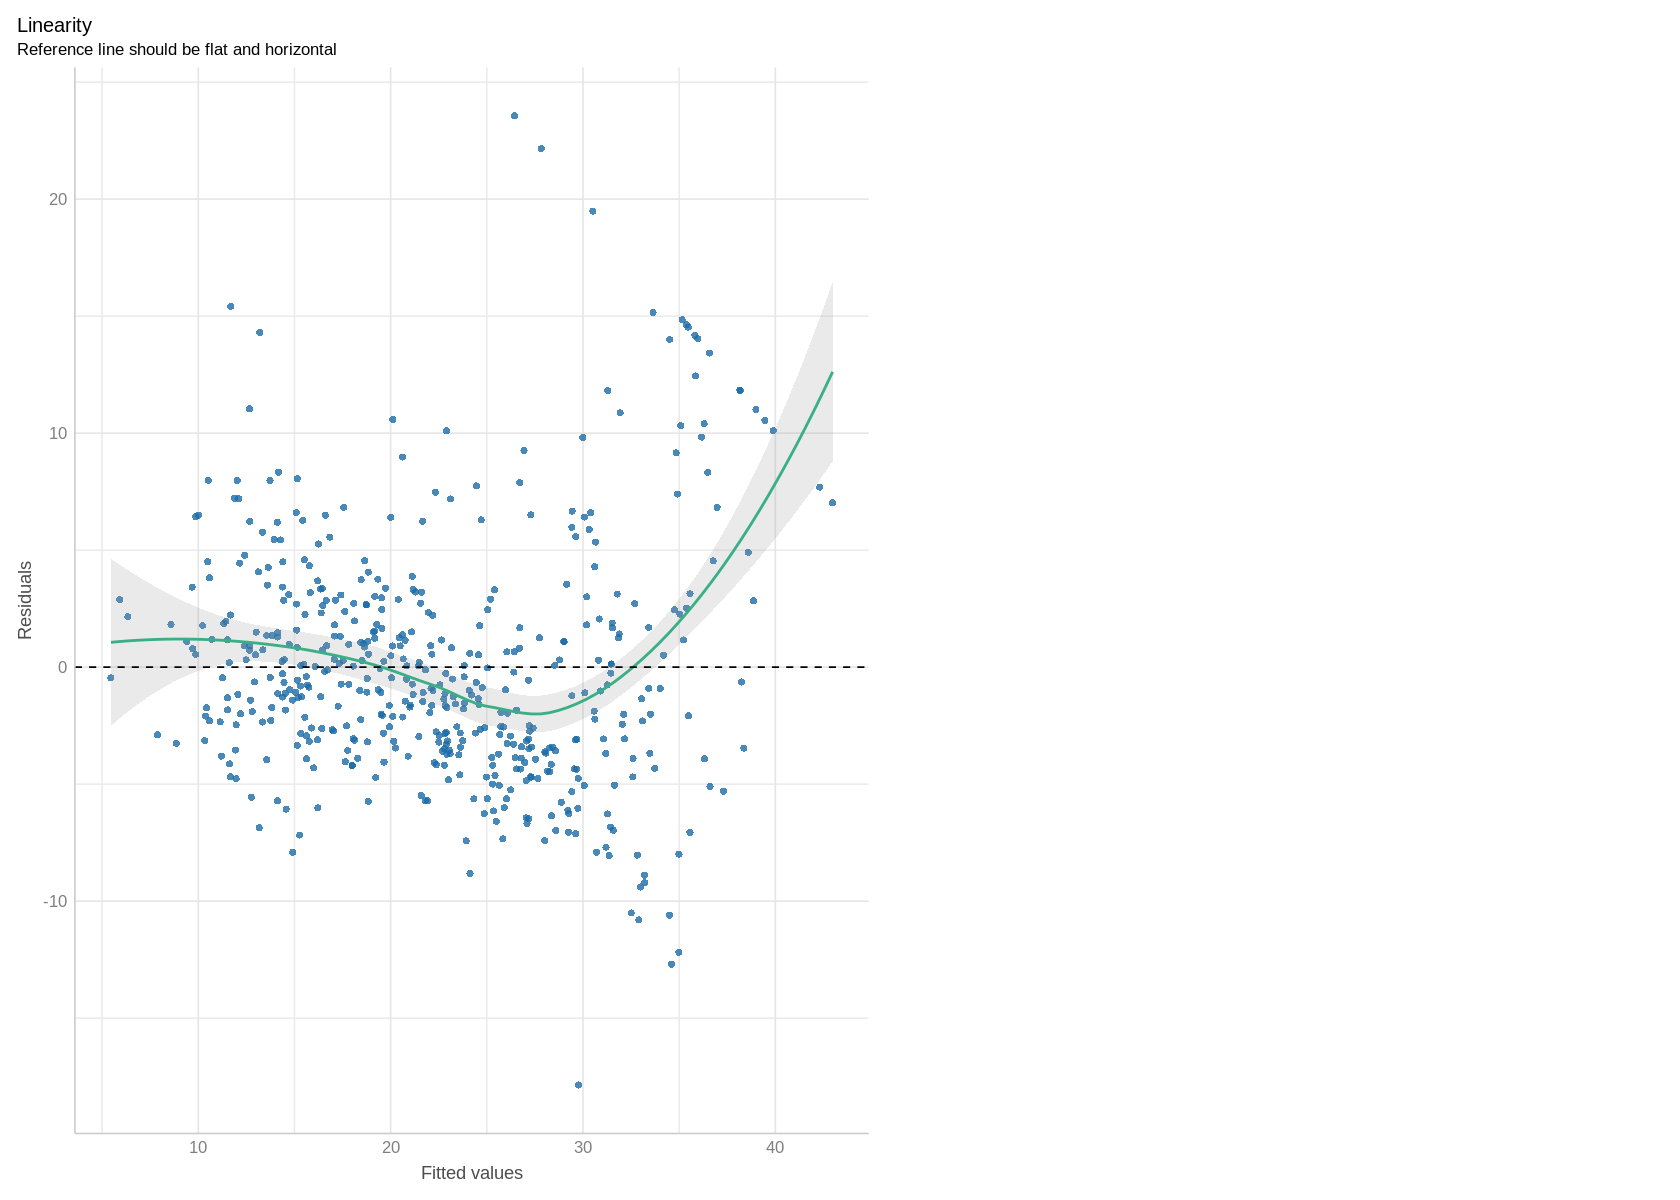

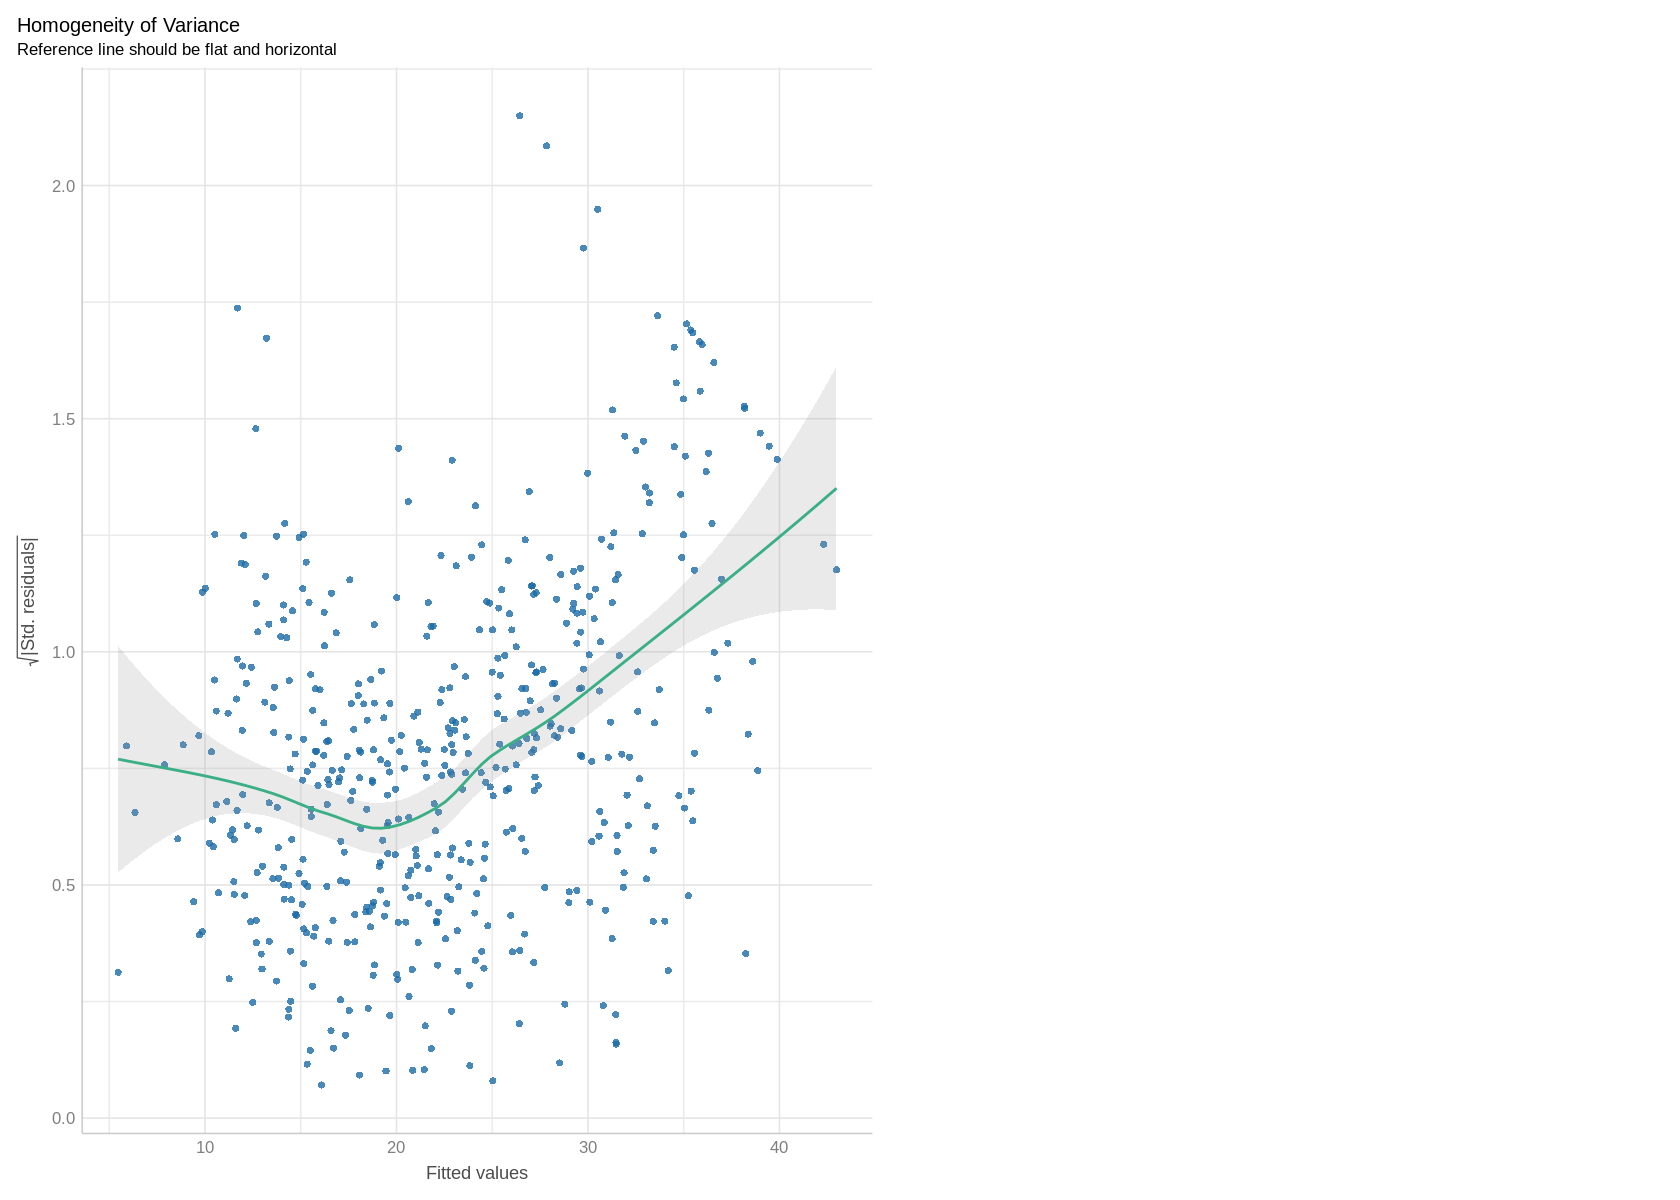

In [ ]:
# check de linearidade e homocedastidade
check_model(modelo_crim2dis2lstat2, check=c("linearity"))
check_model(modelo_crim2dis2lstat2, check=c("homogeneity"))

Resultado: Não é linear nem homogêneo.